# Links:
---
1. Dataset containing words (names):
- https://www.kaggle.com/datasets/landlord/handwriting-recognition/data
---
2. Dataset containing english characters - for training model:
- https://www.kaggle.com/datasets/vaibhao/handwritten-characters
---
3. Original code implementation:
- https://www.kaggle.com/code/aman10kr/offline-handwritten-text-ocr/notebook
---


# Installing dependencies in current env
( needed for i.e. Jupyter Notebook )

In [1]:
%pip install opencv-python


[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: C:\Users\amade\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
%pip install imutils


[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: C:\Users\amade\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: C:\Users\amade\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [4]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: C:\Users\amade\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [15]:
%pip install np_utils


[notice] A new release of pip is available: 23.1.2 -> 24.1.1
[notice] To update, run: C:\Users\amade\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


# Importing

In [1]:
import numpy as np
import pandas as pd
import os
import random

In [91]:
import time

In [2]:
import cv2

In [3]:
import imutils

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

In [6]:
from keras.models import Sequential
from keras import optimizers, utils
from keras.preprocessing import image
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Global const variables

In [7]:
# Characters dataset
IMG_SIZE = 32
CHAR_TRAIN_PATH = "./dataset/characters/Train/"
CHAR_VAL_PATH = "./dataset/characters/Validation/"
# Excldue these characters in model training
EXCLUDE_DIR = ["#","$","&","@", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
# Single character max samples
MAX_SINGLE_CHAR_SAMPLES_TRAIN = 4000
MAX_SINGLE_CHAR_SAMPLES_VAL = 1000

# Getting the dataset - each character

( it is gonna take a lot of time )

In [8]:
train_data = []
for i in os.listdir(CHAR_TRAIN_PATH):
    if i in EXCLUDE_DIR:
        continue
        
    count = 0
    sub_directory = os.path.join(CHAR_TRAIN_PATH,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > MAX_SINGLE_CHAR_SAMPLES_TRAIN:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        train_data.append([img,i])

In [9]:
len(train_data)

104000

In [10]:
val_data = []
for i in os.listdir(CHAR_VAL_PATH):
    if i in EXCLUDE_DIR:
        continue
    count = 0
    sub_directory = os.path.join(CHAR_VAL_PATH,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > MAX_SINGLE_CHAR_SAMPLES_VAL:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        val_data.append([img,i])

In [11]:
len(val_data)

7019

In [12]:
random.shuffle(train_data)
random.shuffle(val_data)

# Extracting features and target into seperate arrays

In [13]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [14]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

# Encode labels into one-hot

In [15]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

# Normalize data
1) Normalize features (image brightness from 0 to 255) to range from 0 to 1
2) Convert to numpy array
3) Reshape features so image can be used in convolutional nn

In [16]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [17]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [18]:
print(train_X.shape,val_X.shape)

(104000, 32, 32, 1) (7019, 32, 32, 1)


In [19]:
print(train_Y.shape,val_Y.shape)

(104000, 26) (7019, 26)


# Create a model

1. Conv2D -> 2D convolutional layer | input_size, kernel (filter) shape, padding, activation function
2. MaxPooling2D -> Downsamples the input along its spatial dimensions (resize to smaller bit)
3. Flatten -> Convert multidimentional array to 1-dimentional
4. Dropout -> Prevents overfitting by disabling gradient in selected neurons
4. Dense -> Layer where each neuron is connected to all previous neurons

# Architecture 1

In [20]:
model_1 = Sequential()

# Convolutional part

model_1.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(64, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

model_1.add(Conv2D(128, (3, 3), activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Classification part

model_1.add(Dropout(0.25))
 
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))

model_1.add(Dense(26, activation='softmax'))

C:\Users\amade\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161,690 (631.60 KB)

 Trainable params: 161,690 (631.60 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile model using "adam" optimizer
model_1.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

# Architecture 2

In [87]:
model_2 = Sequential()

# Convolutional part

model_2.add(Conv2D(32, (3, 3), padding = "same", activation='leaky_relu', input_shape=(32,32,1)))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(64, (3, 3), activation='leaky_relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

model_2.add(Conv2D(96, (3, 3), activation='leaky_relu'))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Classification part

model_2.add(Dropout(0.25))
 
model_2.add(Flatten())
model_2.add(Dense(64, activation='elu'))
model_2.add(Dropout(0.2))

model_2.add(Dense(26, activation='softmax'))

In [88]:
model_2.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)                   │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 5, 5, 96)            │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 2, 2, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 2, 2, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 26)                  │           1,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,538 (392.73 KB)

 Trainable params: 100,538 (392.73 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model_2.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

# Architecture 3

In [109]:
model_3 = Sequential()

# Convolutional part

model_3.add(Conv2D(32, (5, 5), padding = "same", activation='leaky_relu', input_shape=(32,32,1)))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(64, (5, 5), activation='leaky_relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

model_3.add(Conv2D(128, (5, 5), activation='leaky_relu'))
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Classification part

model_3.add(Dropout(0.25))
 
model_3.add(Flatten())
model_3.add(Dense(128, activation='elu'))
model_3.add(Dropout(0.2))

model_3.add(Dense(26, activation='softmax'))

In [110]:
model_3.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_53 (Conv2D)                   │ (None, 32, 32, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 12, 12, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 2, 2, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276,890 (1.06 MB)

 Trainable params: 276,890 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [111]:
model_3.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

---

In [35]:
train_X.shape

(104000, 32, 32, 1)

In [36]:
train_Y.shape

(104000, 26)

In [37]:
val_X.shape

(7019, 32, 32, 1)

In [38]:
val_Y.shape

(7019, 26)

# Train models

In [34]:
start1 = time.time()
history_1 = model_1.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)
end1 = time.time()
length1 = end1 - start1
print("Model 1 took", round(length1 / 60), "mins ")

Epoch 1/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.7490 - loss: 0.8115 - val_accuracy: 0.7981 - val_loss: 1.0487
Epoch 2/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9204 - loss: 0.2270 - val_accuracy: 0.8337 - val_loss: 0.9256
Epoch 3/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9325 - loss: 0.1886 - val_accuracy: 0.8414 - val_loss: 1.0099
Epoch 4/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9388 - loss: 0.1649 - val_accuracy: 0.8275 - val_loss: 1.0285
Epoch 5/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.9430 - loss: 0.1519 - val_accuracy: 0.8377 - val_loss: 0.9738
Epoch 6/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.9458 - loss: 0.1414 - val_accuracy: 0.8409 - val_loss: 1.0474
Epoch 7/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9469 - loss: 0.1362 - val_accuracy: 0.8484 - val_loss: 1.0236
Epoch 8/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9490 - loss: 

In [92]:
start2 = time.time()
history_2 = model_2.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)
end2 = time.time()
length2 = end2 - start2
print("Model 2 took", round(length2 / 60), "mins ")

Epoch 1/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 62s 19ms/step - accuracy: 0.9173 - loss: 0.2389 - val_accuracy: 0.8098 - val_loss: 0.8937
Epoch 2/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.9277 - loss: 0.2020 - val_accuracy: 0.8213 - val_loss: 1.0856
Epoch 3/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.9349 - loss: 0.1795 - val_accuracy: 0.8285 - val_loss: 1.0737
Epoch 4/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9372 - loss: 0.1679 - val_accuracy: 0.8192 - val_loss: 1.1055
Epoch 5/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - accuracy: 0.9410 - loss: 0.1557 - val_accuracy: 0.8134 - val_loss: 1.0944
Epoch 6/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 73s 22ms/step - accuracy: 0.9427 - loss: 0.1467 - val_accuracy: 0.8357 - val_loss: 1.0888
Epoch 7/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 77s 24ms/step - accuracy: 0.9446 - loss: 0.1434 - val_accuracy: 0.8387 - val_loss: 1.1882
Epoch 8/50
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 74s 23ms/step - accuracy: 0.9452 -

In [112]:
start3 = time.time()
history_3 = model_3.fit(train_X,train_Y, epochs=30, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)
end3 = time.time()
length3 = end3 - start3
print("Model 3 took", round(length3 / 60), "mins ")

Epoch 1/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - accuracy: 0.7996 - loss: 0.6356 - val_accuracy: 0.7931 - val_loss: 1.0364
Epoch 2/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.9263 - loss: 0.2070 - val_accuracy: 0.8307 - val_loss: 0.9598
Epoch 3/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.9341 - loss: 0.1796 - val_accuracy: 0.8293 - val_loss: 1.0350
Epoch 4/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 50s 15ms/step - accuracy: 0.9379 - loss: 0.1603 - val_accuracy: 0.8374 - val_loss: 1.0450
Epoch 5/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 53s 16ms/step - accuracy: 0.9448 - loss: 0.1451 - val_accuracy: 0.8339 - val_loss: 1.1314
Epoch 6/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9445 - loss: 0.1418 - val_accuracy: 0.8262 - val_loss: 1.2280
Epoch 7/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.9478 - loss: 0.1330 - val_accuracy: 0.8078 - val_loss: 1.2037
Epoch 8/30
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.9491 -

# Display graphs

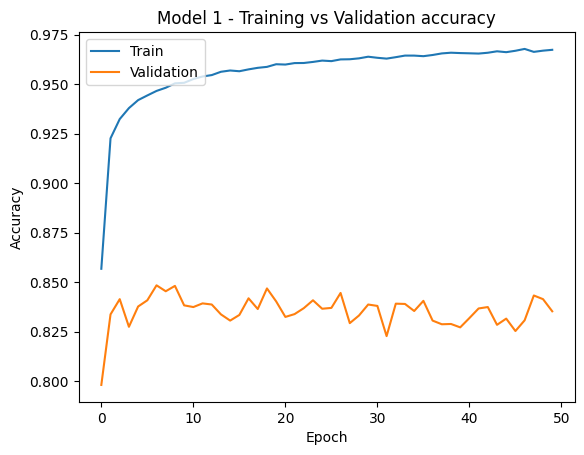

In [51]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model 1 - Training vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

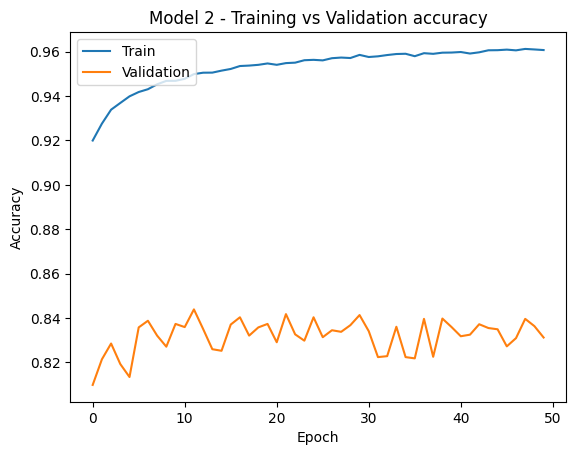

In [94]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model 2 - Training vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

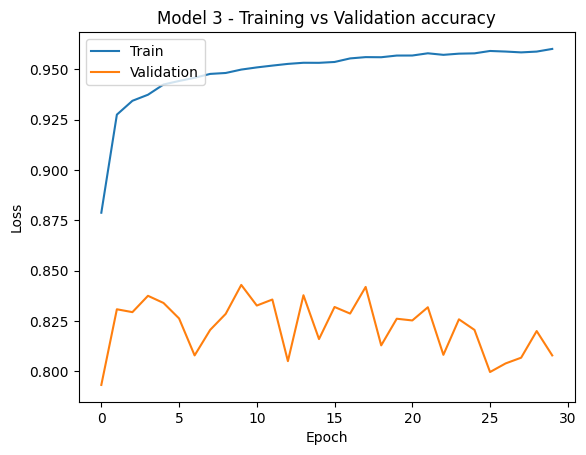

In [116]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model 3 - Training vs Validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model 1 - Training vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

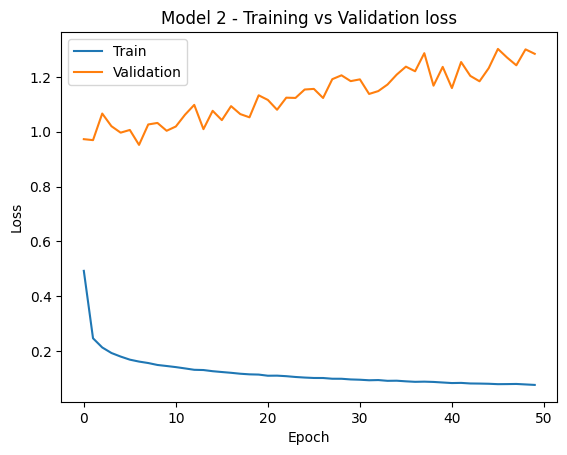

In [125]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model 2 - Training vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

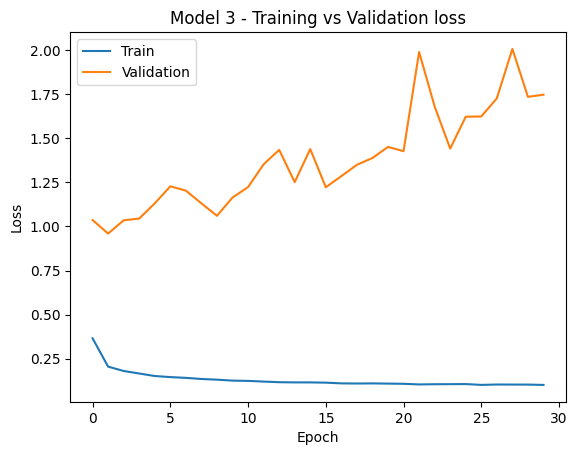

In [114]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model 3 - Training vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [66]:
ypred = model_1.predict(val_X, batch_size=1, verbose=1)

7019/7019 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [67]:
ypred2 = model_2.predict(val_X, batch_size=1, verbose=1)

7019/7019 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


In [117]:
ypred3 = model_3.predict(val_X, batch_size=1, verbose=1)

7019/7019 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [119]:
def showConfuctionMatrix(yp, yt, title = "Confusion matrix"):
    y_pred = np.argmax(yp, axis=1)
    y_test = np.argmax(yt, axis=1)
    vocab = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    voc = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
    annot = np.tile(voc, (26, 1))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(20,15))
    ax=plt.subplot(111)
    sns.heatmap(cm, ax=ax, xticklabels=voc, yticklabels=voc)
    plt.title(title, fontsize = 20) # title with fontsize 20
    plt.xlabel('Actual', fontsize = 15) # x-axis label with fontsize 15
    plt.ylabel('Predicted', fontsize = 15) # y-axis label with fontsize 15
    
    plt.show()

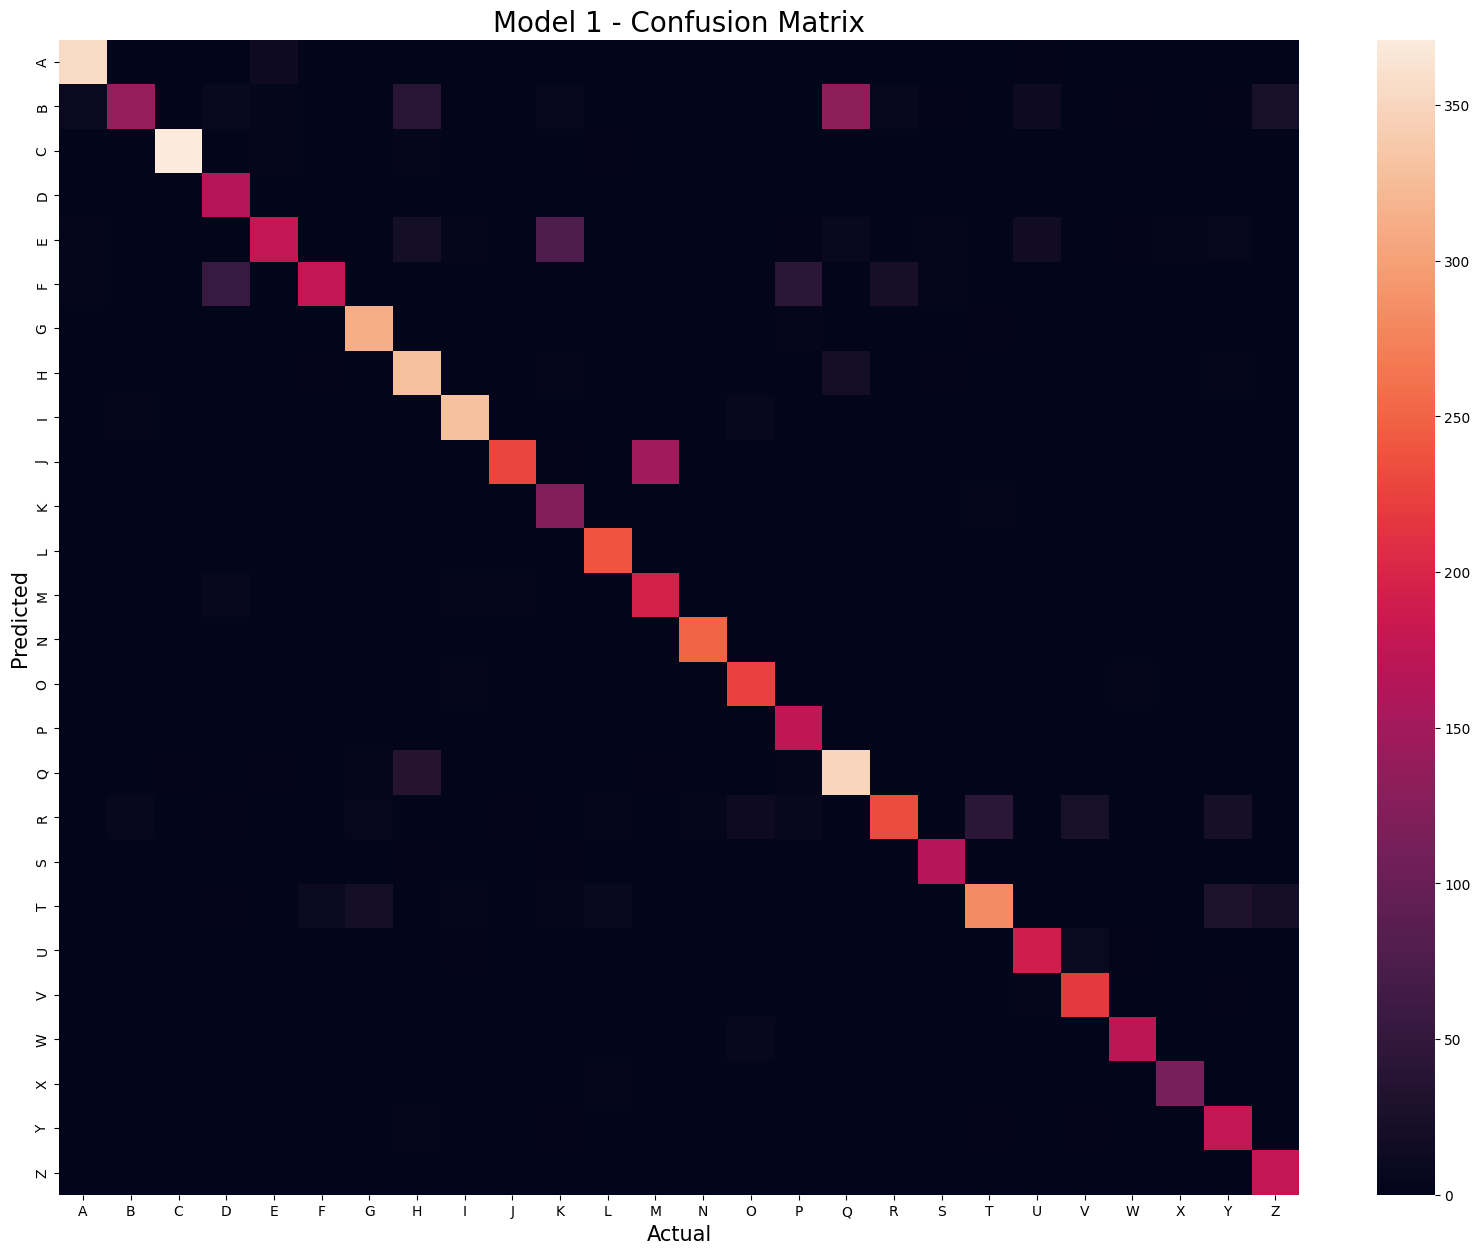

In [122]:
showConfuctionMatrix(ypred, val_Y, "Model 1 - Confusion Matrix")

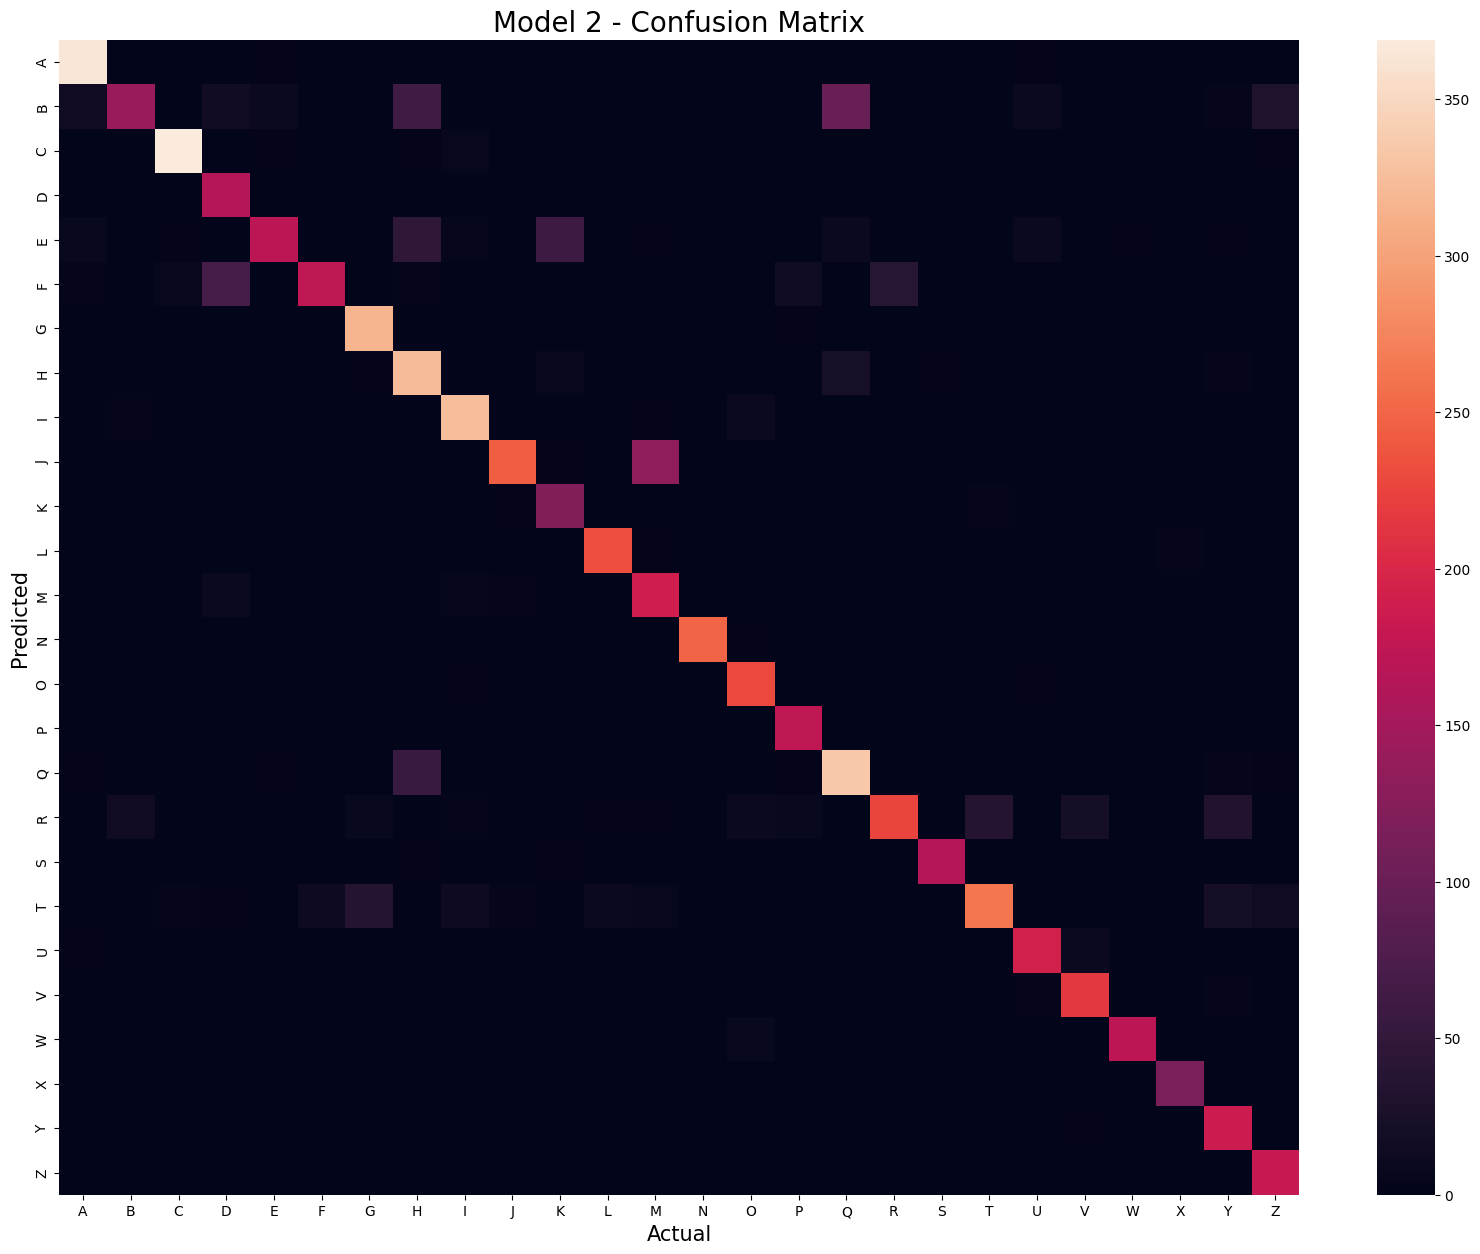

In [123]:
showConfuctionMatrix(ypred2, val_Y, "Model 2 - Confusion Matrix")

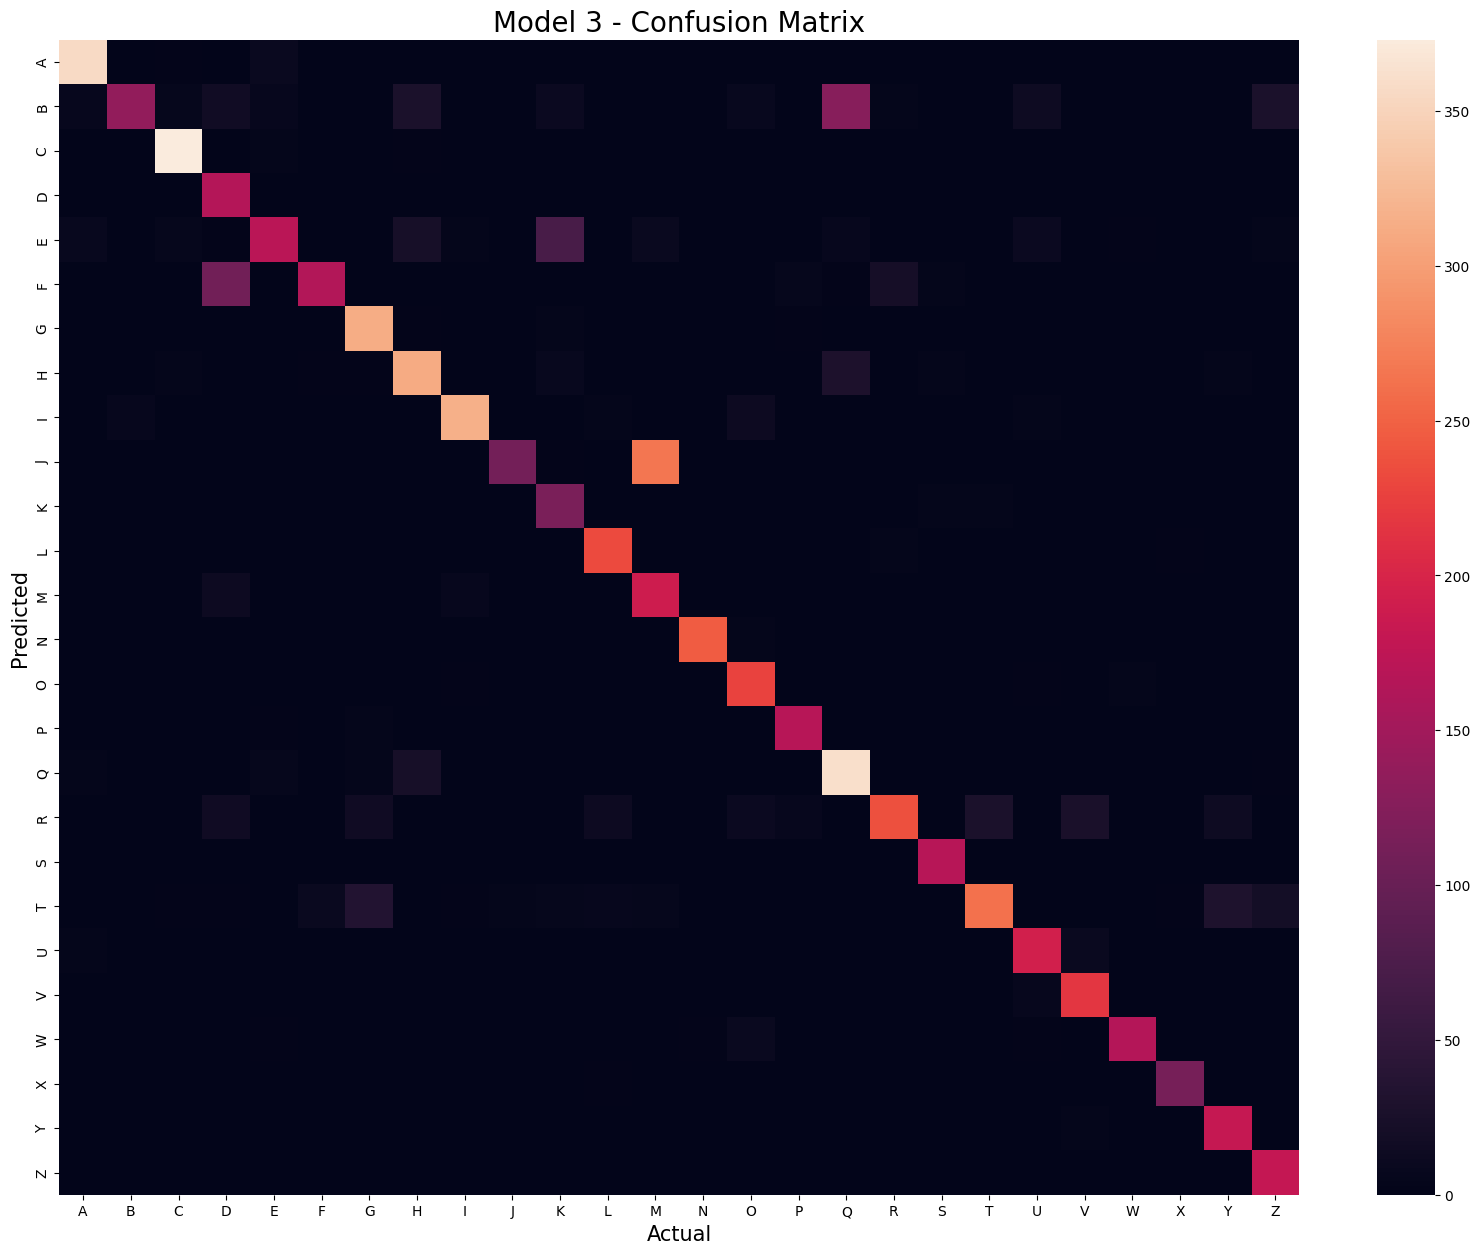

In [120]:
showConfuctionMatrix(ypred3, val_Y, "Model 3 - Confusion Matrix")

(384, 64)


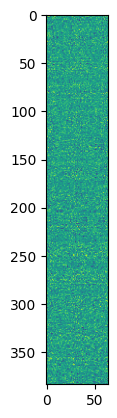

In [113]:
weights, biases = model_2.layers[8].get_weights()
print(weights.shape)
plt.imshow(weights)
plt.show()

(64, 26)


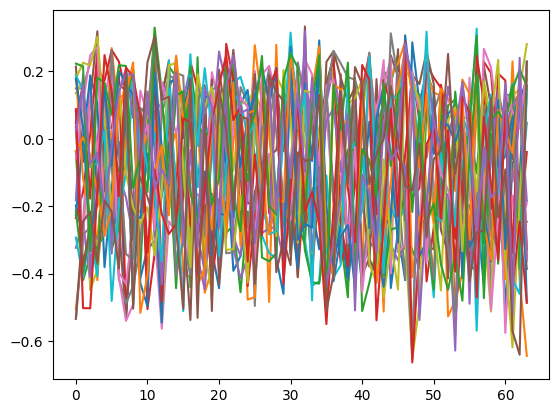

In [108]:
weights, biases = model_2.layers[10].get_weights()
print(weights.shape)
plt.plot(weights)
plt.show()

# Functions for extracting characters from words and using models

In [103]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [108]:
def get_letters(img, model_nr = 1):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            # Mark the contour by placing green rectangle as border
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        if (model_nr == 1):
            ypred = model_1.predict(thresh)
        else:
            ypred = model_2.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [109]:
def get_word(letter):
    word = "".join(letter)
    return word

# Using model on dataset with words

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
BENES


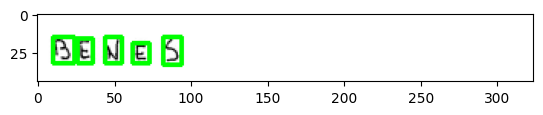

In [110]:
letter,image = get_letters("./dataset/words/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
LIL0U


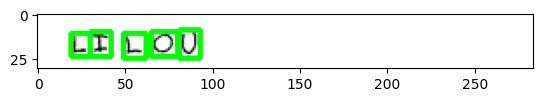

In [111]:
letter,image = get_letters("./dataset/words/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
JAFFEIX


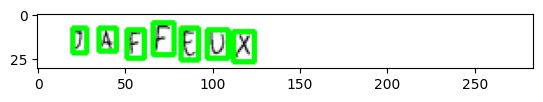

In [112]:
letter,image = get_letters("./dataset/words/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [1]:
letter,image = get_letters("./dataset/words/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

NameError: name 'get_letters' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
VALENTJNE


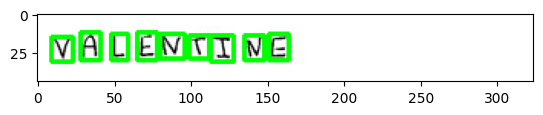

In [114]:
letter,image = get_letters("./dataset/words/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)